### GASS evolution

nb to test the evolution functions 

In [7]:
using PyCall

rootdir = "/home/stephane/Science/ALMA/ArrayConfig/GASS"

push!(LOAD_PATH,"$rootdir/master/src")
using GASS
using Printf

import PyPlot

@pyimport astropy.coordinates as coord
@pyimport astropy.modeling.models as am
@pyimport astropy.modeling.fitting as mf

@pyimport numpy as np


## directory
datadir = "$rootdir/master/data"
wdir    = "$rootdir/products"
plotdir = "$rootdir/products/test"

cd(wdir)

## Input Parameters for GASS 
## Configuration file: ../master/data/O-3.cfg 
## Obs. Latitude: -23.026 
## Source Declination: -50.0 
## HA: 0.0 
## Subarray number: 4 
GASS

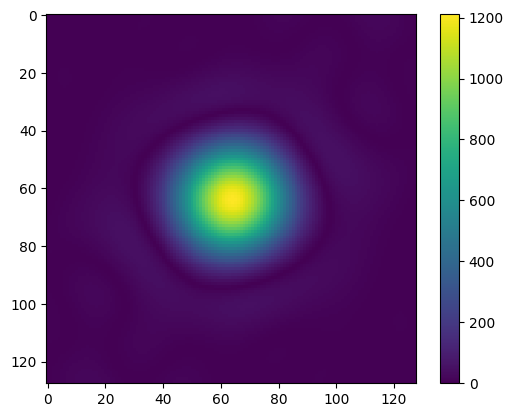

.synthbeam(2.618092189573055, 2.5231548848702348, 2.5701852262360125, 1.0376264276410851, 5.065928454990837)
34.798609146277585


In [8]:
macro main(inpfile)
    cfg = read_cfg(inpfile , verbose=true)
    
    ## array test
    bl= calc_baselines(cfg.arr)
    uv= calc_uv(bl, cfg.obs.Source_Hour_Angle ,  cfg.obs.Source_Declination)
    h , dr=  calc_dirtybeam(uv , 255, 127, robust=0.5)
    b= fit_beam(h , dr)
    mrs= calc_mrs(uv)
    
    println(b)
    println(mrs)
    
    ## PLOT ####
    PyPlot.imshow(h)
    PyPlot.colorbar()
    PyPlot.show()
    
end

@main("../master/data/GA_Inputs_O-3.txt.julia")